In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
#https://analyticsindiamag.com/how-to-implement-lstm-rnn-network-for-sentiment-analysis/

In [3]:
newsData = pd.read_csv('Combined_News_DJIA.csv')
#remove all non-alphabetic char from headlines.
df = newsData.copy()
df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
for i in df.columns:
    if i=='Date':
        continue
    if i=='Label':
        continue
    df[i] = df[i].str.lower()
df['Date'] = newsData['Date']

In [4]:
df.replace("^b ","",regex=True, inplace=True)
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,georgia downs two russian warplanes as count...,breaking musharraf to be impeached,russia today columns of troops roll into sout...,russian tanks are moving towards the capital o...,afghan children raped with impunity u n of...,russian tanks have entered south ossetia w...,breaking georgia invades south ossetia russi...,the enemy combatent trials are nothing but a...,...,georgia invades south ossetia if russia gets...,al qaeda faces islamist backlash,condoleezza rice the us would not act to pre...,this is a busy day the european union has ap...,georgia will withdraw soldiers from iraq...,why the pentagon thinks attacking iran is a ba...,caucasus in crisis georgia invades south osse...,indian shoe manufactory and again in a seri...,visitors suffering from mental illnesses banne...,no help for mexico s kidnapping surge
1,2008-08-11,1,why wont america and nato help us if they won...,bush puts foot down on georgian conflict,jewish georgian minister thanks to israeli tr...,georgian army flees in disarray as russians ad...,olympic opening ceremony fireworks faked,what were the mossad with fraudulent new zeala...,russia angered by israeli military sale to geo...,an american citizen living in s ossetia blames...,...,israel and the us behind the georgian aggressi...,do not believe tv neither russian nor georgi...,riots are still going on in montreal canada ...,china to overtake us as largest manufacturer,war in south ossetia pics,israeli physicians group condemns state torture,russia has just beaten the united states over...,perhaps the question about the georgia rus...,russia is so much better at war,so this is what it s come to trading sex for ...
2,2008-08-12,0,remember that adorable year old who sang at ...,russia ends georgia operation,if we had no sexual harassment we would have ...,al qa eda is losing support in iraq because of...,ceasefire in georgia putin outmaneuvers the w...,why microsoft and intel tried to kill the xo ...,stratfor the russo georgian war and the balan...,i m trying to get a sense of this whole georgi...,...,u s troops still in georgia did you know the...,why russias response to georgia was right,gorbachev accuses u s of making a serious bl...,russia georgia and nato cold war two,remember that adorable year old who led you...,war in georgia the israeli connection,all signs point to the us encouraging georgia ...,christopher king argues that the us and nato a...,america the new mexico,bbc news asia pacific extinction by man n...
3,2008-08-13,0,u s refuses israel weapons to attack iran r...,when the president ordered to attack tskhinval...,israel clears troops who killed reuters camer...,britain s policy of being tough on drugs is ...,body of year old found in trunk latest ra...,china has moved million quake survivors i...,bush announces operation get all up in russia ...,russian forces sink georgian ships,...,elephants extinct by,us humanitarian missions soon in georgia if ...,georgia s ddos came from us sources,russian convoy heads into georgia violating t...,israeli defence minister us against strike on...,gorbachev we had no choice,witness russian forces head towards tbilisi i...,quarter of russians blame u s for conflict ...,georgian president says us military will take...,nobel laureate aleksander solzhenitsyn a...
4,2008-08-14,1,all the experts admit that we should legalise ...,war in south osetia pictures made by a ru...,swedish wrestler ara abrahamian throws away me...,russia exaggerated the death toll in south oss...,missile that killed inside pakistan may have...,rushdie condemns random house s refusal to pub...,poland and us agree to missle defense deal in...,will the russians conquer tblisi bet on it n...,...,bank analyst forecast georgian crisis days e...,georgia confict could set back russia s us rel...,war in the caucasus is as much the product of ...,non media photo

In [5]:
#remove NA and replace with empty string
df.fillna(' ', inplace=True)
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    0
Top24    0
Top25    0
dtype: int64

In [6]:
def mergeCol(row):
    return ' '.join(row['Top1':'Top25'])
df['headlines'] = df.apply(mergeCol, axis = 1)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import re

Using TensorFlow backend.


In [8]:
new_df = df[['Label','headlines']]

In [9]:
tokenizer = Tokenizer(num_words=1500, split=' ')
tokenizer.fit_on_texts(new_df['headlines'].values)
X = tokenizer.texts_to_sequences(new_df['headlines'])
X = pad_sequences(X)

In [10]:
X.shape

(1989, 553)

In [11]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(new_df['Label'])

In [15]:
train = df['Date'] < '2015-01-01'
test = df['Date'] > '2014-12-31'

X_train = X[train,:]
X_test = X[test,:]
y_train = y[train]
y_test = y[test]

In [16]:
embed_dim = 128

lstm_out = 196
vocabSize = 1500

model = Sequential()
model.add(Embedding(vocabSize, embed_dim,input_length = X.shape[1]))
model.add(LSTM(lstm_out, dropout=0.1, recurrent_dropout=0.1))

In [17]:
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [12]:
#from sklearn.preprocessing import LabelEncoder
#Le = LabelEncoder()
#y = Le.fit_transform(new_df['Label'])

In [34]:
model.fit(X_train, y_train,validation_data = (X_test,y_test),epochs = 10, batch_size=32)

Epoch 1/10
59/59 [==============================] - 110s 2s/step - loss: 0.6922 - accuracy: 0.5148 - val_loss: 0.6868 - val_accuracy: 0.5079
Epoch 2/10
59/59 [==============================] - 118s 2s/step - loss: 0.6481 - accuracy: 0.6597 - val_loss: 0.5627 - val_accuracy: 0.7116
Epoch 3/10
59/59 [==============================] - 126s 2s/step - loss: 0.4901 - accuracy: 0.7740 - val_loss: 0.4949 - val_accuracy: 0.7646
Epoch 4/10
59/59 [==============================] - 120s 2s/step - loss: 0.3296 - accuracy: 0.8513 - val_loss: 0.4637 - val_accuracy: 0.8254
Epoch 5/10
59/59 [==============================] - 113s 2s/step - loss: 0.1897 - accuracy: 0.9308 - val_loss: 0.5531 - val_accuracy: 0.8254
Epoch 6/10
59/59 [==============================] - 114s 2s/step - loss: 0.1096 - accuracy: 0.9603 - val_loss: 0.6004 - val_accuracy: 0.8545
Epoch 7/10
59/59 [==============================] - 114s 2s/step - loss: 0.0420 - accuracy: 0.9903 - val_loss: 0.7671 - val_accuracy: 0.8466
Epoch 8/10
59

In [35]:
model.evaluate(X_test,y_test)

12/12 [==============================] - 3s 217ms/step - loss: 0.8502 - accuracy: 0.8598


[0.8501939177513123, 0.8597883582115173]

In [1]:
#from mlxtend.plotting import plot_decision_regions

In [18]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [19]:
def create_model(n=X.shape[1],embed_dim = 128,lstm_out = 300):
	# create model
	model = Sequential()
	model.add(Embedding(vocabSize, embed_dim,input_length = X.shape[1]))
	model.add(LSTM(lstm_out, dropout=0.1, recurrent_dropout=0.1))
	#model.add(Dense(1, activation='sigmoid'))
	# Compile model
	#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	model.add(Dense(2,activation='softmax'))
	model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
	return model

In [ ]:
# seed = 7
# np.random.seed(seed)

# model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32,verbose=1)
# # define the grid search parameters
# embed_dim = [32, 64, 128, 256]
# lstm_out = [100, 200, 300]
# param_grid = dict(embed_dim=embed_dim, lstm_out=lstm_out)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [18]:
# embed_dim = [32, 64, 128, 256]
# lstm_out = [100, 200, 300]
# accx = []
# for e in embed_dim:
#     for ls in lstm_out:
#         model = create_model(n=X.shape[1],embed_dim = e,lstm_out = ls)
#         model.fit(X_train, y_train,validation_data = (X_test,y_test),epochs = 10, batch_size=32)
#         accx.append(model.evaluate(X_test,y_test)[1])

Epoch 1/10
59/59 [==============================] - 26s 442ms/step - loss: 0.6918 - accuracy: 0.5287 - val_loss: 0.6907 - val_accuracy: 0.5079
Epoch 2/10
59/59 [==============================] - 27s 463ms/step - loss: 0.7381 - accuracy: 0.5523 - val_loss: 0.6651 - val_accuracy: 0.5635
Epoch 3/10
59/59 [==============================] - 42s 704ms/step - loss: 0.6398 - accuracy: 0.7096 - val_loss: 0.6158 - val_accuracy: 0.7169
Epoch 4/10
59/59 [==============================] - 32s 538ms/step - loss: 0.5376 - accuracy: 0.7740 - val_loss: 0.5332 - val_accuracy: 0.7513
Epoch 5/10
59/59 [==============================] - 31s 532ms/step - loss: 0.4079 - accuracy: 0.8368 - val_loss: 0.4663 - val_accuracy: 0.8095
Epoch 6/10
59/59 [==============================] - 35s 590ms/step - loss: 0.3067 - accuracy: 0.8867 - val_loss: 0.4573 - val_accuracy: 0.8254
Epoch 7/10
59/59 [==============================] - 33s 559ms/step - loss: 0.2105 - accuracy: 0.9254 - val_loss: 0.4708 - val_accuracy: 0.8545

Epoch 6/10
59/59 [==============================] - 580s 10s/step - loss: 0.1084 - accuracy: 0.9673 - val_loss: 0.7109 - val_accuracy: 0.8254
Epoch 7/10
59/59 [==============================] - 561s 10s/step - loss: 0.0588 - accuracy: 0.9823 - val_loss: 0.7506 - val_accuracy: 0.8413
Epoch 8/10
59/59 [==============================] - 568s 10s/step - loss: 0.0590 - accuracy: 0.9834 - val_loss: 0.7595 - val_accuracy: 0.8545
Epoch 9/10
59/59 [==============================] - 567s 10s/step - loss: 0.0170 - accuracy: 0.9968 - val_loss: 0.8595 - val_accuracy: 0.8545
Epoch 10/10
12/12 [==============================] - 18s 1s/step - loss: 1.0246 - accuracy: 0.8439
Epoch 1/10
59/59 [==============================] - 46s 785ms/step - loss: 0.6920 - accuracy: 0.5271 - val_loss: 0.6885 - val_accuracy: 0.5079
Epoch 2/10
59/59 [==============================] - 45s 764ms/step - loss: 0.6482 - accuracy: 0.6184 - val_loss: 0.5543 - val_accuracy: 0.7302
Epoch 3/10
59/59 [=============================

12/12 [==============================] - 11s 932ms/step - loss: 1.0038 - accuracy: 0.8492
Epoch 1/10
59/59 [==============================] - 790s 13s/step - loss: 0.6922 - accuracy: 0.5212 - val_loss: 0.6737 - val_accuracy: 0.6217
Epoch 2/10
59/59 [==============================] - 2714s 46s/step - loss: 0.6564 - accuracy: 0.6742 - val_loss: 0.6056 - val_accuracy: 0.6878
Epoch 3/10
59/59 [==============================] - 849s 14s/step - loss: 0.5182 - accuracy: 0.7606 - val_loss: 0.4869 - val_accuracy: 0.7672
Epoch 4/10
59/59 [==============================] - 861s 15s/step - loss: 0.3505 - accuracy: 0.8492 - val_loss: 0.4306 - val_accuracy: 0.8307
Epoch 5/10
59/59 [==============================] - 882s 15s/step - loss: 0.1799 - accuracy: 0.9367 - val_loss: 0.4951 - val_accuracy: 0.8413
Epoch 6/10
59/59 [==============================] - 1078s 18s/step - loss: 0.0727 - accuracy: 0.9812 - val_loss: 0.6680 - val_accuracy: 0.8624
Epoch 7/10
59/59 [==============================] - 895s

In [29]:
import matplotlib.pyplot as plt

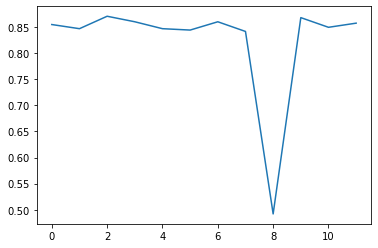

In [30]:
# plt.plot(accx)

In [31]:
# accx

[0.8544973731040955,
 0.8465608358383179,
 0.8703703880310059,
 0.8597883582115173,
 0.8465608358383179,
 0.8439153432846069,
 0.8597883582115173,
 0.841269850730896,
 0.4920634925365448,
 0.8677248954772949,
 0.8492063283920288,
 0.8571428656578064]

In [35]:
# pd.DataFrame(data = np.array(accx).reshape((4,3)), columns= lstm_out, index = embed_dim)

,100,200,300
32,0.854497,0.846561,0.870370
64,0.859788,0.846561,0.843915
128,0.859788,0.841270,0.492063
256,0.867725,0.849206,0.857143


In [20]:
batch_size = [20, 40, 60]
epochs = [5,10]

In [21]:
accy = []
for e in batch_size:
    print(f'Batch size= {e}')
    for ls in epochs:
        model = create_model(n=X.shape[1],embed_dim = 256,lstm_out = 100)
        model.fit(X_train, y_train,validation_data = (X_test,y_test),epochs = ls, batch_size=e)
        accy.append(model.evaluate(X_test,y_test)[1])

Batch size= 20


C:\Users\j88796\AppData\Local\Continuum\anaconda3\envs\poa\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1611 samples, validate on 378 samples
Epoch 1/5
1611/1611 [==============================] - 37s 23ms/step - loss: 0.6919 - accuracy: 0.5307 - val_loss: 0.6921 - val_accuracy: 0.4921
Epoch 2/5
1611/1611 [==============================] - 36s 23ms/step - loss: 0.6110 - accuracy: 0.6946 - val_loss: 0.7660 - val_accuracy: 0.5291
Epoch 3/5
1611/1611 [==============================] - 35s 22ms/step - loss: 0.3874 - accuracy: 0.8355 - val_loss: 0.9040 - val_accuracy: 0.5423
Epoch 4/5
1611/1611 [==============================] - 35s 22ms/step - loss: 0.1892 - accuracy: 0.9448 - val_loss: 1.3917 - val_accuracy: 0.5212
Epoch 5/5
378/378 [==============================] - 2s 5ms/step


C:\Users\j88796\AppData\Local\Continuum\anaconda3\envs\poa\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1611 samples, validate on 378 samples
Epoch 1/10
1611/1611 [==============================] - 36s 22ms/step - loss: 0.6918 - accuracy: 0.5208 - val_loss: 0.6929 - val_accuracy: 0.5053
Epoch 2/10
1611/1611 [==============================] - 35s 22ms/step - loss: 0.5993 - accuracy: 0.6766 - val_loss: 0.7087 - val_accuracy: 0.5688
Epoch 3/10
1611/1611 [==============================] - 35s 22ms/step - loss: 0.3731 - accuracy: 0.8529 - val_loss: 0.9394 - val_accuracy: 0.5106
Epoch 4/10
1611/1611 [==============================] - 35s 22ms/step - loss: 0.1913 - accuracy: 0.9336 - val_loss: 1.3471 - val_accuracy: 0.5370
Epoch 5/10
1611/1611 [==============================] - 35s 21ms/step - loss: 0.0944 - accuracy: 0.9677 - val_loss: 1.6331 - val_accuracy: 0.5291
Epoch 6/10
1611/1611 [==============================] - 35s 22ms/step - loss: 0.0339 - accuracy: 0.9932 - val_loss: 2.1521 - val_accuracy: 0.5079
Epoch 7/10
1611/1611 [==============================] - 35s 22ms/step - loss:

C:\Users\j88796\AppData\Local\Continuum\anaconda3\envs\poa\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1611 samples, validate on 378 samples
Epoch 1/5
1611/1611 [==============================] - 38s 24ms/step - loss: 0.6903 - accuracy: 0.5382 - val_loss: 0.6893 - val_accuracy: 0.5265
Epoch 2/5
1611/1611 [==============================] - 39s 24ms/step - loss: 0.6238 - accuracy: 0.6878 - val_loss: 0.7253 - val_accuracy: 0.5582
Epoch 3/5
1611/1611 [==============================] - 40s 25ms/step - loss: 0.4554 - accuracy: 0.7945 - val_loss: 0.8649 - val_accuracy: 0.5529
Epoch 4/5
1611/1611 [==============================] - 40s 25ms/step - loss: 0.3191 - accuracy: 0.8734 - val_loss: 1.0275 - val_accuracy: 0.5317
Epoch 5/5
378/378 [==============================] - 3s 8ms/step


C:\Users\j88796\AppData\Local\Continuum\anaconda3\envs\poa\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1611 samples, validate on 378 samples
Epoch 1/10
1611/1611 [==============================] - 40s 25ms/step - loss: 0.6915 - accuracy: 0.5320 - val_loss: 0.6924 - val_accuracy: 0.5159
Epoch 2/10
1611/1611 [==============================] - 41s 25ms/step - loss: 0.6626 - accuracy: 0.6412 - val_loss: 0.7310 - val_accuracy: 0.5000
Epoch 3/10
1611/1611 [==============================] - 41s 25ms/step - loss: 0.4940 - accuracy: 0.7840 - val_loss: 0.8378 - val_accuracy: 0.5423
Epoch 4/10
1611/1611 [==============================] - 42s 26ms/step - loss: 0.3188 - accuracy: 0.8833 - val_loss: 0.9922 - val_accuracy: 0.5265
Epoch 5/10
1611/1611 [==============================] - 42s 26ms/step - loss: 0.1802 - accuracy: 0.9404 - val_loss: 1.3155 - val_accuracy: 0.5423
Epoch 6/10
1611/1611 [==============================] - 43s 27ms/step - loss: 0.1004 - accuracy: 0.9745 - val_loss: 1.6121 - val_accuracy: 0.5265
Epoch 7/10
1611/1611 [==============================] - 43s 27ms/step - loss:

C:\Users\j88796\AppData\Local\Continuum\anaconda3\envs\poa\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1611 samples, validate on 378 samples
Epoch 1/5
1611/1611 [==============================] - 40s 25ms/step - loss: 0.6916 - accuracy: 0.5345 - val_loss: 0.6921 - val_accuracy: 0.5132
Epoch 2/5
1611/1611 [==============================] - 41s 25ms/step - loss: 0.6453 - accuracy: 0.6760 - val_loss: 0.7211 - val_accuracy: 0.5159
Epoch 3/5
1611/1611 [==============================] - 41s 25ms/step - loss: 0.5365 - accuracy: 0.7579 - val_loss: 0.7358 - val_accuracy: 0.5556
Epoch 4/5
1611/1611 [==============================] - 41s 25ms/step - loss: 0.4104 - accuracy: 0.8355 - val_loss: 0.8673 - val_accuracy: 0.5608
Epoch 5/5
378/378 [==============================] - 4s 9ms/step


C:\Users\j88796\AppData\Local\Continuum\anaconda3\envs\poa\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1611 samples, validate on 378 samples
Epoch 1/10
1611/1611 [==============================] - 39s 24ms/step - loss: 0.6914 - accuracy: 0.5388 - val_loss: 0.6935 - val_accuracy: 0.5053
Epoch 2/10
1611/1611 [==============================] - 39s 24ms/step - loss: 0.6509 - accuracy: 0.6145 - val_loss: 0.7198 - val_accuracy: 0.4894
Epoch 3/10
1611/1611 [==============================] - 39s 24ms/step - loss: 0.4843 - accuracy: 0.7846 - val_loss: 0.7687 - val_accuracy: 0.5159
Epoch 4/10
1611/1611 [==============================] - 39s 24ms/step - loss: 0.3254 - accuracy: 0.8665 - val_loss: 0.9327 - val_accuracy: 0.5238
Epoch 5/10
1611/1611 [==============================] - 39s 24ms/step - loss: 0.2098 - accuracy: 0.9311 - val_loss: 1.1912 - val_accuracy: 0.5238
Epoch 6/10
1611/1611 [==============================] - 39s 24ms/step - loss: 0.1129 - accuracy: 0.9671 - val_loss: 1.7409 - val_accuracy: 0.5053
Epoch 7/10
1611/1611 [==============================] - 39s 24ms/step - loss:

In [22]:
accy

[0.5449735522270203,
 0.5185185074806213,
 0.5317460298538208,
 0.5158730149269104,
 0.5608465671539307,
 0.4761904776096344]

In [23]:
batch_size = [10]
epochs = [5,10]
b10accy = []
for e in batch_size:
    print(f'Batch size= {e}')
    for ls in epochs:
        model = create_model(n=X.shape[1],embed_dim = 256,lstm_out = 100)
        model.fit(X_train, y_train,validation_data = (X_test,y_test),epochs = ls, batch_size=e)
        b10accy.append(model.evaluate(X_test,y_test)[1])

Batch size= 10


C:\Users\j88796\AppData\Local\Continuum\anaconda3\envs\poa\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1611 samples, validate on 378 samples
Epoch 1/5
1611/1611 [==============================] - 67s 42ms/step - loss: 0.6914 - accuracy: 0.5301 - val_loss: 0.6936 - val_accuracy: 0.5185
Epoch 2/5
1611/1611 [==============================] - 70s 44ms/step - loss: 0.5971 - accuracy: 0.6741 - val_loss: 0.7664 - val_accuracy: 0.5450
Epoch 3/5
1611/1611 [==============================] - 69s 43ms/step - loss: 0.3816 - accuracy: 0.8330 - val_loss: 0.9834 - val_accuracy: 0.5238
Epoch 4/5
1611/1611 [==============================] - 69s 43ms/step - loss: 0.1921 - accuracy: 0.9367 - val_loss: 1.2918 - val_accuracy: 0.5397
Epoch 5/5
378/378 [==============================] - 3s 9ms/step


C:\Users\j88796\AppData\Local\Continuum\anaconda3\envs\poa\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1611 samples, validate on 378 samples
Epoch 1/10
1611/1611 [==============================] - 67s 42ms/step - loss: 0.6920 - accuracy: 0.5220 - val_loss: 0.6918 - val_accuracy: 0.5159
Epoch 2/10
1611/1611 [==============================] - 68s 42ms/step - loss: 0.5973 - accuracy: 0.7107 - val_loss: 0.7371 - val_accuracy: 0.5265
Epoch 3/10
1611/1611 [==============================] - 68s 42ms/step - loss: 0.3681 - accuracy: 0.8510 - val_loss: 0.9428 - val_accuracy: 0.5556
Epoch 4/10
1611/1611 [==============================] - 68s 42ms/step - loss: 0.1929 - accuracy: 0.9317 - val_loss: 1.3014 - val_accuracy: 0.5370
Epoch 5/10
1611/1611 [==============================] - 67s 42ms/step - loss: 0.0738 - accuracy: 0.9764 - val_loss: 1.9105 - val_accuracy: 0.5370
Epoch 6/10
1611/1611 [==============================] - 107s 66ms/step - loss: 0.0264 - accuracy: 0.9944 - val_loss: 2.2200 - val_accuracy: 0.5185
Epoch 7/10
1611/1611 [==============================] - 131s 82ms/step - los

In [24]:
b10accy

[0.5105820298194885, 0.48148149251937866]

# Run 4/28 10:00 AM - before corrected split
- batch=20,epoch=5
- batch=20,epoch=10
- batch=40,epoch=5
- batch=40,epoch=10
- batch=60,epoch=5
- batch=60,epoch=10

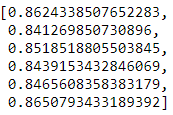

# Run 4/30 7:00 PM - after corrected split
- batch=20,epoch=5
- batch=20,epoch=10
- batch=40,epoch=5
- batch=40,epoch=10
- batch=60,epoch=5
- batch=60,epoch=10

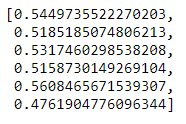
- batch=10,epoch=5
- batch=10,epoch=10
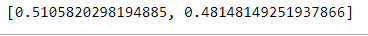